<a href="https://colab.research.google.com/github/anilsolanki2645/CBTCIP/blob/main/Unemployment_Data_Analysis_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**UNEMPLOYMENT ANALYSIS WITH PYTHON**


---



> **Problem Statement**:
The problem is to analyze and gain insights from unemployment data, with a focus on the impact of the COVID-19 pandemic. Unemployment is a critical economic indicator, and the COVID-19 pandemic has caused a sharp increase in unemployment rates globally. Therefore, the goal of this data science project is to perform an Exploratory Data Analysis (EDA) on unemployment data using Python to achieve the following objectives:



> **Introduction**:
Unemployment is a critical economic indicator, and analyzing unemployment data can provide insights into the labor market's health. The COVID-19 pandemic has had a profound impact on unemployment rates worldwide, making it a relevant and interesting subject for data analysis. In this project, we'll use Python to conduct an EDA on unemployment data, aiming to gain a better understanding of unemployment trends, patterns, and their relationship with other factors.




>**Dataset** : Unemployment_Rate_upto_11_2020.csv


> **Dataset Information** :



*   States = states in India (Rename in data cleaning)
*   Date = date which the unemployment rate observed

*   Frequency = measuring frequency (Monthly)
*   Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India


*   Estimated Employed = Number of people employed
*   Estimated Labour Participation Rate (%) = The labour force participation rate is the portion of the working population in the 16-64 years' age group in the economy currently in employment or seeking employment.


*   Region = East, West, north wise region location
*   Longitude and latitude = for absolute location








In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




*   Import necessary libraries



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime as dt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML



*   convert xlsx file to csv file



In [3]:
# Replace 'input_file.xlsx' with the path to your Excel file
excel_file = '/content/drive/MyDrive/CipherByte/Unemployment_EDA/Unemployment_Rate_upto_11_2020.xlsx'

# Replace 'output_file.csv' with the desired path and name for the CSV file
csv_file = 'Unemployment_Rate_upto_11_2020.csv'

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(excel_file)

# Save the DataFrame as a CSV file
df.to_csv(csv_file, index=False)  # Setting index=False to exclude row numbers



*   Load the data csv file into a pandas dataframe



In [4]:
df = pd.read_csv("/content/drive/MyDrive/CipherByte/Unemployment_EDA/Unemployment_Rate_upto_11_2020.csv")




#   Data Exploration:



In [5]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855




*   **Basic information** : To display basic information about the dataset, including column names, data types, and non-null counts:



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB




*   **Summary Statistics**: To calculate and display summary statistics for numerical columns (e.g., mean, min, max):



In [8]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Longitude,Latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600




*   **Unique Values in a Column**:



In [9]:
df['Region.1'].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)



*   **Value Counts** : To get the count of unique values in a specific column (e.g., "Column_Name"):



In [10]:
df['Region.1'].value_counts()

North        79
South        60
West         50
East         40
Northeast    38
Name: Region.1, dtype: int64


*   **Data Types** : To check the data types of each column:





In [11]:
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                           int64
Estimated Labour Participation Rate (%)    float64
Region.1                                    object
Longitude                                  float64
Latitude                                   float64
dtype: object



*   **Shape of the DataFrame** : To get the number of rows and columns in the DataFrame:


In [12]:
df.shape

(267, 9)

# Data Cleaning


*   Remove Unwanted Columns
*   Handling Missing Values

*   Removing Duplicates
*   Standardizing Column Names

*   Convert Data to Numeric











*   **Remove Unwanted Columns :** To remove unwanted columns, such as "Longitude" and "Latitude"




In [13]:
df.drop(columns=['Longitude', 'Latitude'], inplace=True)



*   **Handling Missing Values :**


1.   To drop rows with missing values:


```
# df.dropna()
```



2.   To fill missing values with a specific value (e.g., 0):



```
# df.fillna(0, inplace=True)
```

Note : in this case no any missing value in dataset





In [14]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
dtype: int64

In [15]:
df.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
dtype: int64

In [16]:
df.dropna()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South
...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East




*   **Removing Duplicates :** To remove duplicate rows based on all columns

  in this case no any duplicate value in dataset



In [17]:
df.drop_duplicates()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South
...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East




*   **Standardizing Column Names :** To rename columns to lowercase:



In [18]:
df.columns = df.columns.str.lower()

In [19]:
df.head()

,region,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),region.1
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South




*   **Convert Data to Numeric :** To convert a percentage column to a float

  Note : in this case we have already in a floats data

```
# df['Estimated Unemployment Rate (%)'] = df['Estimated Unemployment Rate (%)'].str.rstrip('%').astype(float)

```
  



# Feature engineering process
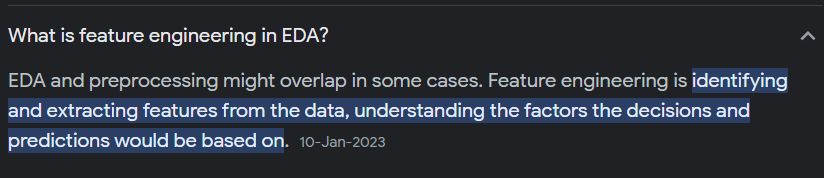



*   Handle Duplicate Columns
*   Data Type Conversion

*   add month_int and month_name feature for better understanding



*   **Handle Duplicate Columns :** To rename one of the duplicate columns

  Note : second option we have To drop one of the duplicate columns if needed.


```
# df.drop(columns='Region.1')
```







In [20]:
df.rename(columns={'region': 'state'}, inplace=True)
df.rename(columns={'region.1': 'region'}, inplace=True)



*   **Data Type Conversion :** To convert a column to a different data type (e.g., convert a date column to datetime)





In [21]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['frequency'] = df['frequency'].astype('category')
df['region'] = df['region'].astype('category')



*   Extract month from 'Date' and create a 'Month' column



In [22]:
df['month'] = df['date'].dt.month

In [23]:
df.head()

,state,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),region,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,5




*   Convert 'Month' to integer format




In [24]:
df['month_int'] = df['month'].apply(lambda x: int(x))

In [25]:
df.head()

,state,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),region,month,month_int
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,1,1
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,2,2
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,3,3
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,4,4
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,5,5




*   Map integer month values to abbreviated month names



In [26]:
df['month_name'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])

In [27]:
df.head()

,state,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),region,month,month_int,month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,1,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,2,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,3,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,4,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,5,5,May




*   Drop the original 'month' column



In [28]:
df.drop(columns='month', inplace=True)

In [29]:
df

,state,date,frequency,estimated unemployment rate (%),estimated employed,estimated labour participation rate (%),region,month_int,month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,5,May
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,6,Jun
263,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,7,Jul
264,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,8,Aug
265,West Bengal,2020-09-30,M,9.35,35707239,47.73,East,9,Sep


# Data Visualization



*   **Question 1 :** What is the trend of unemployment rates over time for different regions?


*   **Solution :** To visualize the trend of unemployment rates over time, you can create a line plot for each region, showing how the unemployment rate changes from January to October 2020.



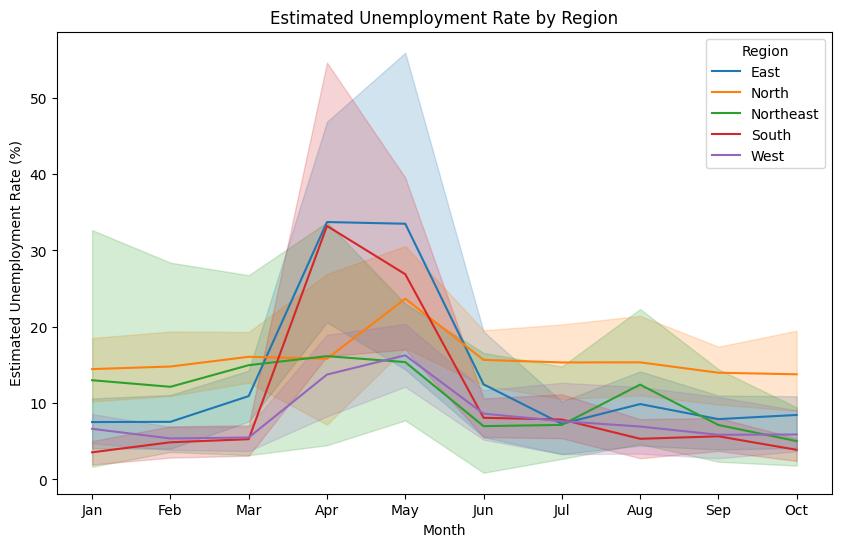

In [30]:
# Plot a line plot for Estimated Unemployment Rate by Region
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month_name', y='estimated unemployment rate (%)', hue='region')
plt.title('Estimated Unemployment Rate by Region')
plt.xlabel('Month')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(title='Region')
plt.show()



*   **Question 2 :** How do the unemployment rates vary among different states in a particular month?


*   **Solution :** To compare unemployment rates among states in a specific month, create a bar plot for that month.



In [31]:
# Create an animated bar plot for the monthly unemployment rate by state
fig = px.bar(df, x='state', y='estimated unemployment rate (%)', animation_frame='month_name', color='state',
             title='Unemployment Rate from Jan 2020 to Oct 2020 (State)')

# Set the order of states on the x-axis in descending order
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Show the animated bar plot
fig.show()




*   **Question 3 :** What is the average unemployment rate in each region, and how does it compare?


*   **Solution :** Create a bar plot to visualize the average unemployment rate in each region and compare them.



In [32]:

# Create a bar plot for the average unemployment rate by region
fig = px.bar(df, x='region', y='estimated unemployment rate (%)', color='region',
             title='Average Unemployment Rate by Region')

# Set the order of regions on the x-axis in descending order
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Show the bar plot
fig.show()




*   **Question 4 :** How does the estimated employed population change over time?


*   **Solution :** To visualize changes in the estimated employed population over time, create a line plot for each state with a larger figure size.



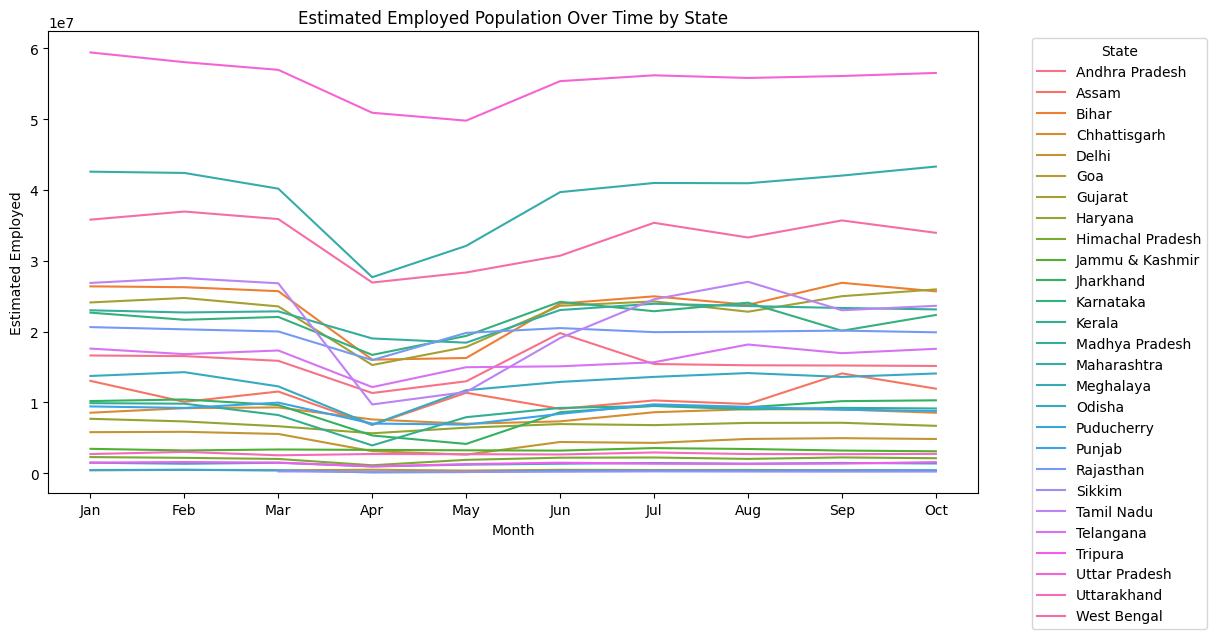

In [33]:

# Create a larger figure size
plt.figure(figsize=(12, 6))

# Create a line plot for estimated employed population by state over time
sns.lineplot(data=df, x='month_name', y='estimated employed', hue='state')
plt.title('Estimated Employed Population Over Time by State')
plt.xlabel('Month')
plt.ylabel('Estimated Employed')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()






*   **Question 5 :** What is the relationship between the unemployment rate and labor participation rate in different states?


*   **Solution :** To explore the relationship between the unemployment rate and labor participation rate with a larger figure size, create a scatter plot.



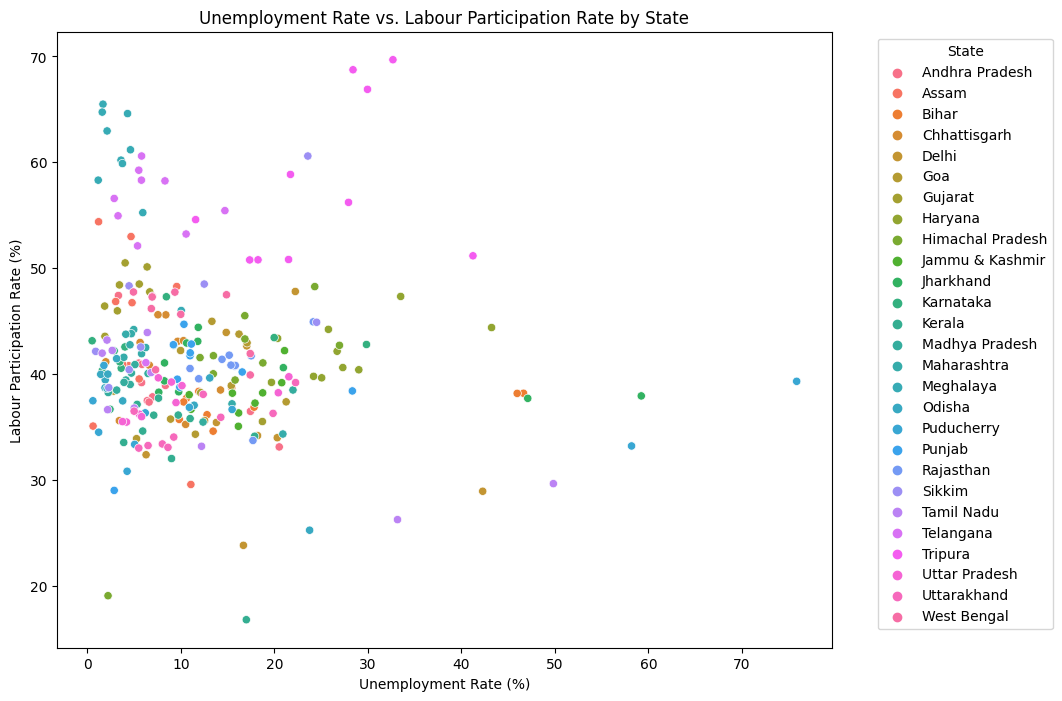

In [34]:

# Create a larger figure size
plt.figure(figsize=(10, 8))

# Create a scatter plot to explore the relationship
sns.scatterplot(data=df, x='estimated unemployment rate (%)', y='estimated labour participation rate (%)', hue='state')
plt.title('Unemployment Rate vs. Labour Participation Rate by State')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Labour Participation Rate (%)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()





*   **Question 6 :** Are there any notable outliers in the dataset, and what could be the reasons for these outliers?


*   **Solution :** Use box plots to identify and explore potential outliers in the dataset.



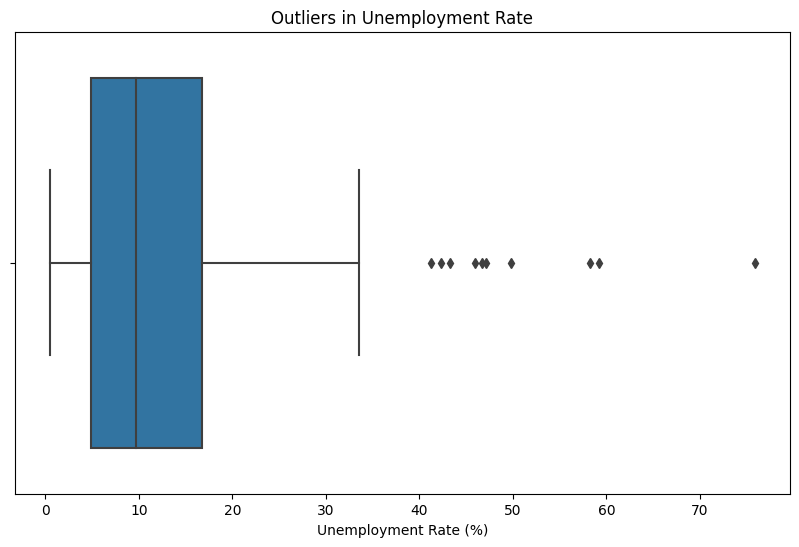

In [35]:

# Create a box plot to identify outliers in the unemployment rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='estimated unemployment rate (%)')
plt.title('Outliers in Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.show()




*   **Question 7 :** What is the distribution of the estimated labor participation rate in the dataset, and does it show any particular patterns?


*   **Solution :** To explore the distribution of the estimated labor participation rate, you can plot a histogram with a kernel density estimation. This allows you to visualize the frequency of labor participation rates and identify any potential patterns or clusters in the data.



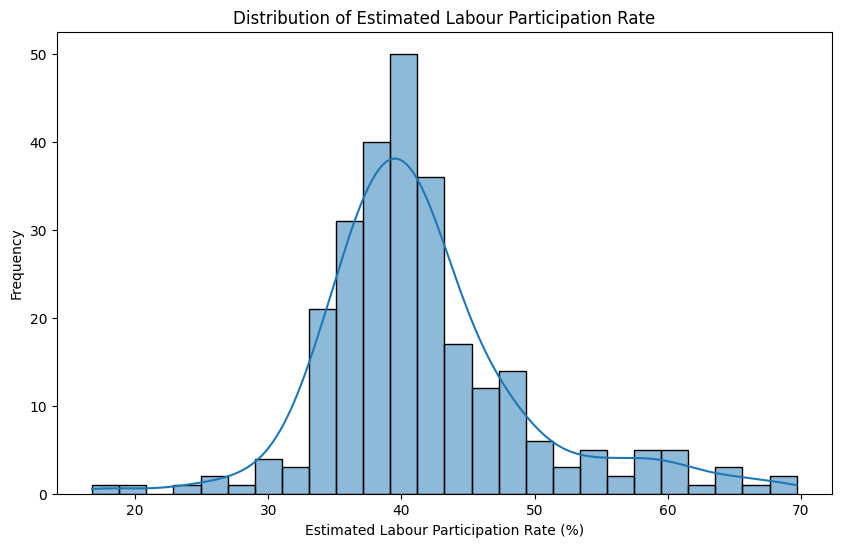

In [36]:
# Plot a histogram of Estimated Labour Participation Rate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='estimated labour participation rate (%)', kde=True)
plt.title('Distribution of Estimated Labour Participation Rate')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()




*   **Question 8 :** How is the distribution of unemployment rates across different regions and states, and can we identify any patterns or variations?


*   **Solution :** To explore the distribution of unemployment rates across regions and states, create a Sunburst chart. This chart allows you to visualize the hierarchical relationship between regions and states and how the estimated unemployment rates vary.



In [37]:
# Create a Sunburst chart
fig = px.sunburst(df, path=['region', 'state'], values='estimated unemployment rate (%)',
                 title='Unemployment Rate in States and Regions', height=600)

# Show the Sunburst chart
fig.show()



*   **Question 9 :** How do unemployment rates change from January 2020 to October 2020 in different regions and states, and are there any significant variations?


*   **Solution :** To visualize the changes in unemployment rates over time for different regions and states, create an animated bar chart. This chart allows you to track the monthly variations in unemployment rates.



In [38]:
# Create an animated bar chart
fig = px.bar(df, x='region', y='estimated unemployment rate (%)', animation_frame='month_name', color='state',
             title='Unemployment rate from Jan 2020 to Oct 2020')

# Set the order of regions on the x-axis in descending order
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Set the duration of each frame in milliseconds (e.g., 2000ms or 2 seconds)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000

# Show the animated bar chart
fig.show()



*   **Question 10 :** What is the distribution of regions in the dataset, and how do they compare in terms of frequency?


*   **Solution :** To explore the distribution of regions, you can count the frequency of each region and create a pie chart to visualize the proportion of each region in the dataset.



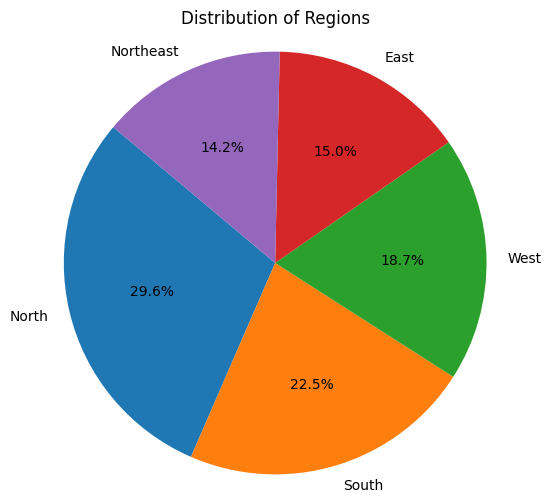

In [39]:
# Count the frequency of each region
region_counts = df['region'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Regions')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()



*   **Question 11 :** How do the unemployment rate and labor participation rate change over the months, and is there any noticeable correlation or trend between the two?


*   **Solution :** To compare the changes in the unemployment rate and labor participation rate over the months, you can create a grouped bar chart. This chart allows you to visualize the two variables side by side and identify any patterns or correlations between them.



In [40]:
# Extract relevant columns from your DataFrame
month = df['month_name']
unemployment_rate = df['estimated unemployment rate (%)']
labour_participation_rate = df['estimated labour participation rate (%)']

# Create a Plotly Figure
fig = go.Figure()

# Add bars for unemployment rate and labor participation rate
fig.add_trace(go.Bar(x=month, y=unemployment_rate, name='Unemployment Rate'))
fig.add_trace(go.Bar(x=month, y=labour_participation_rate, name='Labour Participation Rate'))

# Update the layout to set the order of months on the x-axis
fig.update_layout(
    title='Unemployment Rate and Labour Participation',
    xaxis={'categoryorder': 'array', 'categoryarray': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']}
)

# Show the bar chart
fig.show()





*   **Question 12 :** How does the number of estimated employed people change over the months, and is there any seasonality or trend in employment?


*   **Solution :** To visualize changes in the number of estimated employed people over the months, you can create a bar chart. This chart allows you to observe the variations and patterns in employment throughout the year.



In [41]:
# Create a bar chart for estimated employed people
fig = px.bar(df, x='month_name', y='estimated employed', color='month_name',
             category_orders={'month_name': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']},
             title='Estimated Employed People from Jan 2020 to Oct 2020')

# Show the bar chart
fig.show()



*   **Question 13 :** What is the average unemployment rate in different states, and how do states compare in terms of unemployment?


*   **Solution :** To explore the average unemployment rate in different states, you can create a bar plot. This chart helps you compare the states based on their average unemployment rates.



In [42]:
# average unemployment rate bar plot

fig = px.bar(df,x='state',y='estimated unemployment rate (%)',color='state',title='Average unemployment rate (State)')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()



*   **Question 14 :** What were the specific dates and corresponding month names during which the highest unemployment rates were recorded, and what were the unemployment rates on those dates?



In [43]:

# Group the data by 'Date' and 'month_name' and find the maximum unemployment rate in each group
highest_unemployment = df.groupby(['date', 'month_name'])['estimated unemployment rate (%)'].max().reset_index()

# Sort the data by the maximum unemployment rate in descending order
highest_unemployment = highest_unemployment.sort_values(by='estimated unemployment rate (%)', ascending=False)

# Display the rows with the highest unemployment rates
print(highest_unemployment.head(3))


        date month_name  estimated unemployment rate (%)
3 2020-04-30        Apr                            75.85
4 2020-05-31        May                            59.23
7 2020-08-31        Aug                            33.50




*   **Question 15 :** Which states experienced the highest unemployment rates during the given time period, and what were the specific unemployment rates in those states?



In [44]:
# Group the data by 'state' and find the maximum unemployment rate in each state
highest_unemployment_by_state = df.groupby('state')['estimated unemployment rate (%)'].max().reset_index()

# Sort the data by the maximum unemployment rate in descending order
highest_unemployment_by_state = highest_unemployment_by_state.sort_values(by='estimated unemployment rate (%)', ascending=False)

# Display the states with the highest unemployment rates and their corresponding rates
print(highest_unemployment_by_state.head(3))


         state  estimated unemployment rate (%)
17  Puducherry                            75.85
10   Jharkhand                            59.23
21  Tamil Nadu                            49.83




*   **Question 16 :** Which regions had the highest unemployment rates during the given time period, and what were the specific unemployment rates in those regions?



In [45]:
# Group the data by 'region' and find the maximum unemployment rate in each region
highest_unemployment_by_region = df.groupby('region')['estimated unemployment rate (%)'].max().reset_index()

# Sort the data by the maximum unemployment rate in descending order
highest_unemployment_by_region = highest_unemployment_by_region.sort_values(by='estimated unemployment rate (%)', ascending=False)

# Display the regions with the highest unemployment rates and their corresponding rates
print(highest_unemployment_by_region.head())


      region  estimated unemployment rate (%)
3      South                            75.85
0       East                            59.23
1      North                            43.22
2  Northeast                            41.23
4       West                            21.98





*   **Question 17 :** During the COVID-19 period, which specific state had the highest unemployment rate, and what was the unemployment rate in that state?





In [46]:
# Filter the data for the COVID-19 period
covid_data = df[df['date'] >= '2020-03-01']

# Find the state with the highest unemployment rate during the COVID-19 period
highest_unemployment_during_covid = covid_data[covid_data['estimated unemployment rate (%)'] == covid_data['estimated unemployment rate (%)'].max()]

# Display the state with the highest unemployment rate during COVID-19 and the corresponding rate
print(highest_unemployment_during_covid[['state', 'estimated unemployment rate (%)']])


          state  estimated unemployment rate (%)
172  Puducherry                            75.85




*   **Question 18 :** During the COVID-19 period, which specific month had the highest unemployment rate, and what was the unemployment rate in that month?



In [47]:
# Filter the data for the COVID-19 period
covid_data = df[df['date'] >= '2020-03-01']

# Find the month with the highest unemployment rate during the COVID-19 period
highest_unemployment_month_during_covid = covid_data[covid_data['estimated unemployment rate (%)'] == covid_data['estimated unemployment rate (%)'].max()]

# Display the month with the highest unemployment rate during COVID-19 and the corresponding rate
print(highest_unemployment_month_during_covid[['month_name', 'estimated unemployment rate (%)']])


    month_name  estimated unemployment rate (%)
172        Apr                            75.85




*   **Question 19 :** What were the specific dates and corresponding month names during which the lowest unemployment rates were recorded, and what were the unemployment rates on those dates?



In [48]:
# Group the data by 'Date' and 'month_name' and find the minimum unemployment rate in each group
lowest_unemployment = df.groupby(['date', 'month_name'])['estimated unemployment rate (%)'].min().reset_index()

# Sort the data by the minimum unemployment rate in ascending order
lowest_unemployment = lowest_unemployment.sort_values(by='estimated unemployment rate (%)')

# Display the rows with the lowest unemployment rates
print(lowest_unemployment.head(3))


        date month_name  estimated unemployment rate (%)
7 2020-08-31        Aug                             0.50
0 2020-01-31        Jan                             0.58
5 2020-06-30        Jun                             0.60




*   **Question 20 :** Which states experienced the lowest unemployment rates during the given time period, and what were the specific unemployment rates in those states?



In [49]:
# Group the data by 'state' and find the minimum unemployment rate in each state
lowest_unemployment_by_state = df.groupby('state')['estimated unemployment rate (%)'].min().reset_index()

# Sort the data by the minimum unemployment rate in ascending order
lowest_unemployment_by_state = lowest_unemployment_by_state.sort_values(by='estimated unemployment rate (%)')

# Display the states with the lowest unemployment rates and their corresponding rates
print(lowest_unemployment_by_state.head(3))


         state  estimated unemployment rate (%)
11   Karnataka                             0.50
17  Puducherry                             0.58
1        Assam                             0.60




*   **Question 21 :** Which regions had the lowest unemployment rates during the given time period, and what were the specific unemployment rates in those regions?



In [50]:
# Group the data by 'region' and find the minimum unemployment rate in each region
lowest_unemployment_by_region = df.groupby('region')['estimated unemployment rate (%)'].min().reset_index()

# Sort the data by the minimum unemployment rate in ascending order
lowest_unemployment_by_region = lowest_unemployment_by_region.sort_values(by='estimated unemployment rate (%)')

# Display the regions with the lowest unemployment rates and their corresponding rates
print(lowest_unemployment_by_region.head(3))


      region  estimated unemployment rate (%)
3      South                             0.50
2  Northeast                             0.60
0       East                             1.42
